In [1]:
import pandas as pd
import numpy as np
import seaborn as sb 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = "D:\codes_python\sds project\games_with_null_values.csv"
games = pd.read_csv(file)
games.head()

,Unnamed: 0,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_time
0,0,fyfWyjj2,1.0,56.0,resign,black,10+6,mindworm,2180.0,lolmens,2134.0,d4 Nf6 c4 c6 d5 e6 Nc3 Bb4 Bg5 Bxc3+ bxc3 O-O ...,A50,Slav Indian,4.0,152.045167
1,1,QmCyfnNZ,1.0,55.0,resign,white,10+0,philipp_0x,1291.0,alywezza,1326.0,Nf3 c5 d4 cxd4 Nxd4 d5 g3 Nc6 c3 Nf6 Bg2 e5 Nx...,A04,Zukertort Opening: Sicilian Invitation,2.0,137.408000
2,2,X1hUH5gY,1.0,2.0,resign,white,180+180,chiggen,1291.0,drakon1,965.0,e4 d5,B01,Scandinavian Defense,2.0,0.929667
3,3,xfD25ZBl,1.0,111.0,resign,white,9+5,khelil,1611.0,gleb763,1418.0,e4 e5 Bc4 c6 Qh5 d5 exd5 cxd5 Bb5+ Nc6 Qxe5+ B...,C23,Bishop's Opening: Philidor Counterattack,4.0,169.290000
4,4,BFo44qd4,1.0,25.0,mate,white,10+0,elvis1997,2168.0,kabuto87,1650.0,e4 Nc6 d4 d5 e5 Qd7 Be2 Qe6 c4 dxc4 d5 Qxe5 Nf...,B00,Nimzowitsch Defense: Scandinavian Variation | ...,5.0,49.667500


In [3]:
games.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [4]:
games

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_time
0,fyfWyjj2,1.0,56.0,resign,black,10+6,mindworm,2180.0,lolmens,2134.0,d4 Nf6 c4 c6 d5 e6 Nc3 Bb4 Bg5 Bxc3+ bxc3 O-O ...,A50,Slav Indian,4.0,152.045167
1,QmCyfnNZ,1.0,55.0,resign,white,10+0,philipp_0x,1291.0,alywezza,1326.0,Nf3 c5 d4 cxd4 Nxd4 d5 g3 Nc6 c3 Nf6 Bg2 e5 Nx...,A04,Zukertort Opening: Sicilian Invitation,2.0,137.408000
2,X1hUH5gY,1.0,2.0,resign,white,180+180,chiggen,1291.0,drakon1,965.0,e4 d5,B01,Scandinavian Defense,2.0,0.929667
3,xfD25ZBl,1.0,111.0,resign,white,9+5,khelil,1611.0,gleb763,1418.0,e4 e5 Bc4 c6 Qh5 d5 exd5 cxd5 Bb5+ Nc6 Qxe5+ B...,C23,Bishop's Opening: Philidor Counterattack,4.0,169.290000
4,BFo44qd4,1.0,25.0,mate,white,10+0,elvis1997,2168.0,kabuto87,1650.0,e4 Nc6 d4 d5 e5 Qd7 Be2 Qe6 c4 dxc4 d5 Qxe5 Nf...,B00,Nimzowitsch Defense: Scandinavian Variation | ...,5.0,49.667500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,eBZNlH7w,1.0,55.0,resign,black,20+0,sdmabunda,1518.0,rehcsif6rehcsif,1546.0,e4 e5 Nf3 Nc6 Bb5 a6 Bxc6 dxc6 Nxe5 Qd4 Nxf7 Q...,C68,Ruy Lopez: Exchange Variation,7.0,181.858500
9363,MtDU2OuN,1.0,30.0,mate,black,20+5,aradov,1060.0,rodrigowski19,1202.0,e4 c5 d4 cxd4 Qxd4 Nc6 Qe3 Nf6 Nf3 d5 e5 Ng4 Q...,B21,Sicilian Defense: Smith-Morra Gambit #2,3.0,32.038167
9364,wL5yxYVK,1.0,61.0,resign,white,15+15,azomio,1410.0,karanlikyol,1355.0,f4 f6 e3 e5 fxe5 fxe5 Qh5+ g6 Qxe5+ Qe7 Qxh8 N...,A02,Bird Opening,1.0,157.164167
9365,ayNGChBy,1.0,79.0,resign,black,10+0,dastan-2009,1593.0,summu,1885.0,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 a6 Be3 Nc6 N...,B90,Sicilian Defense: Najdorf Variation | English...,11.0,86.955000


In [5]:
for i in range(len(games["moves"])):
    if type(games["moves"].iloc[i]) == str:
        games["moves"].iloc[i] = (games["moves"].iloc[i]).split()
total = 0
for i in games:
    total += games[i].isnull().sum()
    print(i, "->", games[i].isnull().sum())
print("total null values : ", total)

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


id -> 31
rated -> 34
turns -> 22
victory_status -> 26
winner -> 25
increment_code -> 38
white_id -> 32
white_rating -> 27
black_id -> 30
black_rating -> 28
moves -> 28
opening_eco -> 28
opening_name -> 36
opening_ply -> 36
game_time -> 29
total null values :  450


In [6]:
games.describe()

,rated,turns,white_rating,black_rating,opening_ply,game_time
count,9333.000000,9345.000000,9340.000000,9339.000000,9331.000000,9338.000000
mean,0.814101,61.228571,1619.026660,1610.368990,4.943522,156.143948
std,0.389046,34.063919,289.789293,287.836558,2.923557,1077.763159
min,0.000000,1.000000,784.000000,789.000000,1.000000,0.320333
25%,1.000000,38.000000,1426.000000,1421.000000,3.000000,63.082458
50%,1.000000,56.000000,1595.000000,1586.000000,4.000000,109.546667
75%,1.000000,80.000000,1809.000000,1802.000000,6.000000,169.171667
max,1.000000,349.000000,2700.000000,2621.000000,28.000000,100974.116833


In [7]:
game_time_sd = games["game_time"].std()
game_time_mean = games["game_time"].mean()
new_game_time = (games["game_time"] - game_time_mean)/game_time_sd
new_game_time

0      -0.003803
1      -0.017384
2      -0.144015
3       0.012198
4      -0.098794
          ...   
9362    0.023859
9363   -0.115151
9364    0.000947
9365   -0.064197
9366   -0.035816
Name: game_time, Length: 9367, dtype: float64

In [8]:
new_game_time_dict = dict(new_game_time.value_counts())
new_game_time_dict

{-0.026796191817120354: 3,
 -0.12195361651804046: 3,
 -0.11984740238311646: 3,
 -0.060071436964737004: 3,
 0.003393805297760021: 3,
 0.16339509920778852: 3,
 -0.09572630201750862: 3,
 -0.1348956992761846: 3,
 -0.09747900620291454: 3,
 0.033248230850761853: 3,
 -0.04612588698768522: 3,
 -0.054521207044284974: 3,
 -0.09031200177580828: 3,
 -0.013924316196806992: 3,
 -0.06838788997223168: 3,
 -0.11432547181557859: 3,
 0.13597967580867956: 3,
 2.94794766166878: 3,
 -0.04432818219190759: 3,
 -0.14087768763016878: 3,
 0.032344197970235765: 3,
 -0.12372163018944911: 3,
 -0.12412215108588473: 3,
 0.0458163910113843: 3,
 -0.10624778493321776: 3,
 -0.02202318893353527: 3,
 -0.12873711058871412: 3,
 -0.10025512633141348: 3,
 -0.0855317307524037: 3,
 0.8918776604896221: 2,
 -0.07704780124651532: 2,
 -0.02511570510609106: 2,
 0.37718542166148417: 2,
 -0.10004666989573965: 2,
 -0.06137428968769843: 2,
 -0.06446263054588985: 2,
 -0.1034407365501678: 2,
 -0.13420135996151436: 2,
 -0.055609417680662354

<BarContainer object of 9013 artists>

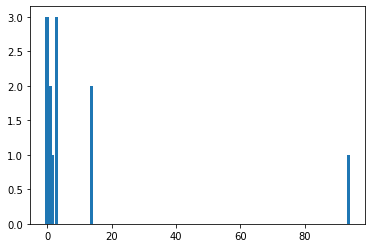

In [9]:
plt.bar(x = new_game_time_dict.keys(), height = new_game_time_dict.values())

In [10]:
new_game_time.describe()

count    9.338000e+03
mean    -6.964382e-17
std      1.000000e+00
min     -1.445806e-01
25%     -8.634688e-02
50%     -4.323518e-02
75%      1.208774e-02
max      9.354372e+01
Name: game_time, dtype: float64

(-10, 10)

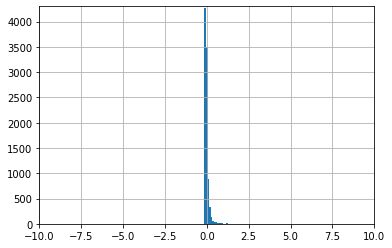

In [11]:
graph = new_game_time.hist(bins = 1000)
graph.set_ylim([0,4300])
graph.set_xlim([-10, 10])


In [12]:
game_time_min = games["game_time"].min()
game_time_max = games["game_time"].max()
new1_game_time = (games["game_time"] - game_time_min)/(game_time_max - game_time_min)
new1_game_time

0       0.001503
1       0.001358
2       0.000006
3       0.001673
4       0.000489
          ...   
9362    0.001798
9363    0.000314
9364    0.001553
9365    0.000858
9366    0.001161
Name: game_time, Length: 9367, dtype: float64

(-0.2, 0.2)

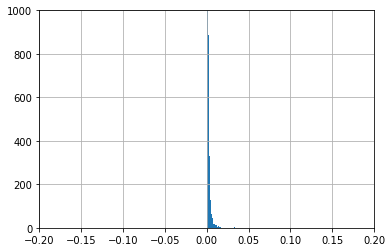

In [13]:
graph = new1_game_time.hist(bins = 1000)
graph.set_ylim([0,1000])
graph.set_xlim([-0.2, 0.2])

Handling null values starts from here

In [14]:
total = 0
for i in games:
    total += games[i].isnull().sum()
    print(i, "->", games[i].isnull().sum())
print("total null values : ", total)

id -> 31
rated -> 34
turns -> 22
victory_status -> 26
winner -> 25
increment_code -> 38
white_id -> 32
white_rating -> 27
black_id -> 30
black_rating -> 28
moves -> 28
opening_eco -> 28
opening_name -> 36
opening_ply -> 36
game_time -> 29
total null values :  450


id column does not matter much. So we can replace the missing values with any string that looks like all other id's.

rated column does not mattermuch. So we can replace the missing values in this column with half number of 1's and half number of 0's. 

turns column's missing values can be replaced with the column's length of the moves column if they are not null.

victory_status column's entries can be determined to an extent from moves' column. If we are not able to we drop the entire row corresponding to that null entry. 

winner column's entries can be determined to an extent from moves' column. If we are not able to we drop the entire row corresponding to that null entry. 

increment_code column's missing entries can be replaced with the mode as it is skewed. 

white_id and black_id does not matter. So we can replace the missing values with any string that looks like all other id's.

white_rating and black_rating missing values can be replaced with the column means as they are approximately normally distributed.

moves column is important for determining winner column and victory_status column. Dropping the entire row is the only option for handling the missing values. But dropping the entire row will depend on the status of other values.

opening_eco's missing values can be determined from moves column. If we cannot determine we can choose to drop the entire entry or not.

opening_name's missing values can be determined from moves column. If we cannot determine we can choose to drop the entire entry or not.

opening_ply's missing values can be determined from moves column. If we cannot determine we can choose to drop the entire entry or not.

game_time's missing value can be given by the median of the column.
    

In [15]:
print(games["id"].isnull().sum())

31


In [16]:
games["id"]

0       fyfWyjj2
1       QmCyfnNZ
2       X1hUH5gY
3       xfD25ZBl
4       BFo44qd4
          ...   
9362    eBZNlH7w
9363    MtDU2OuN
9364    wL5yxYVK
9365    ayNGChBy
9366    W1fKatN0
Name: id, Length: 9367, dtype: object

In [17]:
avg = 0
c = 0
for i in range(len(games["id"])):
    if not games["id"].isnull().iloc[i]:
        avg += len(games["id"].iloc[i])
        c += 1
avg /= c
avg


8.0

In [18]:
import string
import random
for i in range(len(games["id"])):
    if games["id"].isnull().iloc[i]:
        games["id"].iloc[i] = ''.join(random.choices(string.ascii_uppercase + 
                                                     string.digits + string.ascii_lowercase, k = 8))

In [19]:
games["id"].isnull().sum()

0

In [20]:
games["id"]

0       fyfWyjj2
1       QmCyfnNZ
2       X1hUH5gY
3       xfD25ZBl
4       BFo44qd4
          ...   
9362    eBZNlH7w
9363    MtDU2OuN
9364    wL5yxYVK
9365    ayNGChBy
9366    W1fKatN0
Name: id, Length: 9367, dtype: object

In [21]:
games["rated"]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9362    1.0
9363    1.0
9364    1.0
9365    1.0
9366    0.0
Name: rated, Length: 9367, dtype: float64

In [22]:
games["rated"].isnull().sum()

34

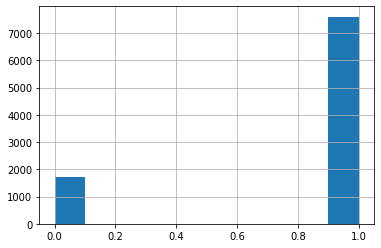

In [23]:
games["rated"].hist()

In [24]:
null_index = []
for i in range(len(games["rated"])):
    if games["rated"].isnull().iloc[i]:
        null_index.append(i)
null_index

[357,
 906,
 1304,
 1448,
 1666,
 2154,
 2311,
 2535,
 2895,
 3053,
 3310,
 3602,
 3664,
 3758,
 3981,
 4152,
 4298,
 4514,
 4685,
 5014,
 5396,
 5912,
 5925,
 6505,
 6536,
 6614,
 6877,
 8139,
 8360,
 8695,
 8707,
 8930,
 9155,
 9222]

In [25]:
replace_1 = random.sample(null_index, 17)
for i in replace_1:
    null_index.remove(i)
replace_0 = null_index
del(null_index)

In [26]:
replace_1

[5396,
 2895,
 906,
 5912,
 5014,
 3053,
 8360,
 4298,
 8707,
 3310,
 1304,
 6505,
 5925,
 357,
 4152,
 2311,
 9155]

In [27]:
replace_0

[1448,
 1666,
 2154,
 2535,
 3602,
 3664,
 3758,
 3981,
 4514,
 4685,
 6536,
 6614,
 6877,
 8139,
 8695,
 8930,
 9222]

In [28]:
for i in replace_1:
    games["rated"].iloc[i] = 1
for i in replace_0:
    games["rated"].iloc[i] = 0

games["rated"].isnull().sum()

0

In [29]:
games["rated"]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9362    1.0
9363    1.0
9364    1.0
9365    1.0
9366    0.0
Name: rated, Length: 9367, dtype: float64

In [30]:
games["white_id"]

0            mindworm
1          philipp_0x
2             chiggen
3              khelil
4           elvis1997
            ...      
9362        sdmabunda
9363           aradov
9364           azomio
9365      dastan-2009
9366    bronyaurstomp
Name: white_id, Length: 9367, dtype: object

In [31]:
games["white_id"].isnull().sum()

32

In [32]:
for i in range(len(games["white_id"])):
    if games["white_id"].isnull().iloc[i]:
        games["white_id"].iloc[i] = "Player_White_" + str(i)


In [33]:
games["white_id"].isnull().sum()

0

In [34]:
games["black_id"].isnull().sum()

30

In [35]:
for i in range(len(games["black_id"])):
    if games["black_id"].isnull().iloc[i]:
        games["black_id"].iloc[i] = "Player_Black_" + str(i)

In [36]:
games["black_id"].isnull().sum()

0

In [37]:
games["increment_code"].isnull().sum()

38

In [38]:
mode = str(games["increment_code"].mode())
for i in range(len(games["increment_code"])):
    if games["increment_code"].isnull().iloc[i]:
        games["increment_code"].iloc[i] = mode

In [39]:
count = 0
for i in range(len(games["increment_code"])):
    if type(games["increment_code"].iloc[i]) == str:
        count += 1
count == len(games["increment_code"])

True

In [40]:
games["white_rating"].isnull().sum()

27

In [41]:
mean = games["white_rating"].mean()
for i in range(len(games["white_rating"])):
    if games["white_rating"].isnull().iloc[i]:
        games["white_rating"].iloc[i] = mean

In [42]:
games["white_rating"].isnull().sum()

0

In [43]:
games["black_rating"].isnull().sum()

28

In [44]:
mean = games["black_rating"].mean()
for i in range(len(games["black_rating"])):
    if games["black_rating"].isnull().iloc[i]:
        games["black_rating"].iloc[i] = mean

In [45]:
games["black_rating"].isnull().sum()

0

In [46]:
games["game_time"].describe()

count      9338.000000
mean        156.143948
std        1077.763159
min           0.320333
25%          63.082458
50%         109.546667
75%         169.171667
max      100974.116833
Name: game_time, dtype: float64

In [47]:
games["game_time"].mode()

0        4.311167
1       10.758333
2       17.395833
3       22.369667
4       22.801333
5       24.706833
6       26.976833
7       32.928167
8       41.634000
9       48.092667
10      51.084667
11      52.973667
12      58.809000
13      63.961000
14      82.438000
15      91.401167
16      97.383000
17     106.431167
18     108.368667
19     127.264000
20     132.408167
21     141.136833
22     159.801667
23     191.003333
24     191.977667
25     205.523167
26     302.697833
27     332.245167
28    3333.333333
dtype: float64

In [48]:
games["game_time"].isnull().sum()

29

In [49]:
median = games["game_time"].median()
for i in range(len(games["game_time"])):
    if games["game_time"].isnull().iloc[i]:
        games["game_time"].iloc[i] = median

In [50]:
games["game_time"].isnull().sum()

0

In [51]:
games["opening_name"].isnull().sum()

36

In [52]:
count = 0
for i in range(len(games["opening_name"])):
    if games["opening_name"].isnull().iloc[i] and games["opening_ply"].isnull().iloc[i]:
        count += 1
count

0

In [53]:
moves = []
for i in range(len(games["opening_name"])):
    if games["opening_name"].isnull().iloc[i]:
        moves.append((i, games["moves"].iloc[i][:int(games["opening_ply"].iloc[i])]))

In [54]:
moves

[(197, ['e4', 'e5', 'Nf3', 'Nc6', 'd4', 'exd4', 'Nxd4']),
 (201, ['e4', 'e5', 'Nf3', 'Nc6', 'Bb5', 'a6', 'Ba4', 'Nf6', 'Nc3']),
 (625, ['e4', 'e5', 'd3']),
 (1424, ['e3']),
 (1515, ['e4', 'e5', 'Nf3', 'Nc6', 'Bc4', 'Be7']),
 (2000, ['e4', 'e5', 'd4', 'Nc6', 'd5']),
 (2189, ['d4', 'd5', 'c4', 'e6', 'Nc3']),
 (2435, ['e4', 'c5', 'Nh3']),
 (2491, ['d4', 'd5', 'c4', 'Nf6']),
 (2648, ['d4', 'b6']),
 (2741, ['e4', 'Nf6', 'e5', 'Nd5', 'd4', 'd6', 'Nf3', 'Bg4']),
 (3041, ['d4', 'Nf6']),
 (3504, ['e4', 'e5', 'Nf3', 'Nc6', 'c3', 'Nf6']),
 (3650, ['d4', 'g6']),
 (4057, ['d4', 'd5', 'c4', 'e6', 'Nc3', 'Nf6', 'Nf3', 'Be7', 'Bf4']),
 (4131, ['e4', 'c5', 'Nc3', 'Nc6']),
 (4235, ['e4', 'e5', 'Nf3', 'Nc6', 'Bc4', 'Nf6', 'd3']),
 (4734, ['e4', 'Nf6']),
 (4810, ['e4', 'c5', 'Nf3', 'd6', 'd4', 'Nf6']),
 (4917, ['e4', 'e6']),
 (5055,
  ['d4',
   'd5',
   'c4',
   'e6',
   'Nc3',
   'Nf6',
   'Bg5',
   'Be7',
   'e3',
   'O-O',
   'Nf3',
   'h6',
   'Bh4',
   'b6',
   'cxd5',
   'Nxd5']),
 (5588, ['d4']),
 

In [55]:
for i, j in moves:
    for k in range(len(games["moves"])):
        cond_1 = not games["moves"].isnull().iloc[k]
        cond_2 = not games["opening_ply"].isnull().iloc[k]
        cond_3 = i != k and k not in [197, 201, 625, 1424, 1515, 2000, 2189, 2435, 2491, 2648, 2741, 3041,
                                      3504, 3650, 4057, 4131, 4235, 4734, 4810, 4917, 5055, 5588, 6061,
                                      6104, 6160, 6196, 6226, 6334, 6442, 7447, 7902, 7928, 8780, 9059,
                                      9233, 9320]
        if cond_3 and cond_1 and cond_2 and j == games["moves"].iloc[k][:int(games["opening_ply"].iloc[k])]:
            print((i, k, j, games["opening_name"].iloc[k]))
            break
    

(197, 463, ['e4', 'e5', 'Nf3', 'Nc6', 'd4', 'exd4', 'Nxd4'], 'Scotch Game')
(201, 490, ['e4', 'e5', 'Nf3', 'Nc6', 'Bb5', 'a6', 'Ba4', 'Nf6', 'Nc3'], 'Ruy Lopez: Morphy Defense |  Tarrasch Variation')
(625, 28, ['e4', 'e5', 'd3'], "King's Pawn Game: Leonardis Variation")
(1424, 18, ['e3'], "Van't Kruijs Opening")
(1515, 111, ['e4', 'e5', 'Nf3', 'Nc6', 'Bc4', 'Be7'], 'Italian Game: Hungarian Defense')
(2000, 1388, ['e4', 'e5', 'd4', 'Nc6', 'd5'], 'Nimzowitsch Defense: Kennedy Variation |  Linksspringer Variation')
(2189, 521, ['d4', 'd5', 'c4', 'e6', 'Nc3'], "Queen's Gambit Declined: Queen's Knight Variation")
(2435, 1063, ['e4', 'c5', 'Nh3'], 'Sicilian Defense: Brick Variation')
(2491, 31, ['d4', 'd5', 'c4', 'Nf6'], "Queen's Gambit Refused: Marshall Defense")
(2648, 202, ['d4', 'b6'], 'English Defense #2')
(2741, 2700, ['e4', 'Nf6', 'e5', 'Nd5', 'd4', 'd6', 'Nf3', 'Bg4'], 'Alekhine Defense: Modern Variation |  Main Line')
(3041, 204, ['d4', 'Nf6'], 'Indian Game')
(3504, 264, ['e4', 'e5'

In [56]:
for i, j in moves:
    for k in range(len(games["moves"])):
        cond_1 = not games["moves"].isnull().iloc[k]
        cond_2 = not games["opening_ply"].isnull().iloc[k]
        cond_3 = i != k and k not in [197, 201, 625, 1424, 1515, 2000, 2189, 2435, 2491, 2648, 2741, 3041,
                                      3504, 3650, 4057, 4131, 4235, 4734, 4810, 4917, 5055, 5588, 6061,
                                      6104, 6160, 6196, 6226, 6334, 6442, 7447, 7902, 7928, 8780, 9059,
                                      9233, 9320]
        if cond_3 and cond_1 and cond_2 and j == games["moves"].iloc[k][:int(games["opening_ply"].iloc[k])]:
            games["opening_name"].iloc[i] = games["opening_name"].iloc[k]
            break

In [57]:
games["opening_name"].isnull().sum()

2

In [58]:
counter = 0
still_null = []
for i in range(len(games["opening_name"])):
    if counter < 2 and games["opening_name"].isnull().iloc[i]:
        print(i, counter, games["moves"].iloc[i][:int(games["opening_ply"].iloc[i])])
        counter += 1
        still_null.append(games["moves"].iloc[i][:int(games["opening_ply"].iloc[i])])
still_null

4057 0 ['d4', 'd5', 'c4', 'e6', 'Nc3', 'Nf6', 'Nf3', 'Be7', 'Bf4']
5055 1 ['d4', 'd5', 'c4', 'e6', 'Nc3', 'Nf6', 'Bg5', 'Be7', 'e3', 'O-O', 'Nf3', 'h6', 'Bh4', 'b6', 'cxd5', 'Nxd5']


[['d4', 'd5', 'c4', 'e6', 'Nc3', 'Nf6', 'Nf3', 'Be7', 'Bf4'],
 ['d4',
  'd5',
  'c4',
  'e6',
  'Nc3',
  'Nf6',
  'Bg5',
  'Be7',
  'e3',
  'O-O',
  'Nf3',
  'h6',
  'Bh4',
  'b6',
  'cxd5',
  'Nxd5']]

In [59]:
for i in range(len(games["moves"])):
    cond_1 = not games["opening_ply"].isnull().iloc[i]
    cond_2 = not games["moves"].isnull().iloc[i]
    if cond_1 and cond_2 and games["moves"].iloc[i][:int(games["opening_ply"].iloc[i])] == still_null[0]:
        print(still_null[0], "->", games["opening_name"].iloc[i])
    if cond_1 and cond_2 and games["moves"].iloc[i][:int(games["opening_ply"].iloc[i])] == still_null[1]:
        print(still_null[1], "->", games["opening_name"].iloc[i])

['d4', 'd5', 'c4', 'e6', 'Nc3', 'Nf6', 'Nf3', 'Be7', 'Bf4'] -> nan
['d4', 'd5', 'c4', 'e6', 'Nc3', 'Nf6', 'Bg5', 'Be7', 'e3', 'O-O', 'Nf3', 'h6', 'Bh4', 'b6', 'cxd5', 'Nxd5'] -> nan


In [60]:
possible_0 = []
possible_1 = []
for i in range(len(games["moves"])):
    cond_1 = not games["opening_ply"].isnull().iloc[i]
    cond_2 = not games["moves"].isnull().iloc[i]
    if cond_1 and cond_2:
        for j in range(int(games["opening_ply"].iloc[i])):
            if games["moves"].iloc[i][:j] == still_null[0][:j]:
                #print(j, "->", still_null[0][:j], games["opening_name"].iloc[i])
                if j >= 6:
                    possible_0.append((j, games["opening_name"].iloc[i]))
        #print(still_null[0], "->", games["opening_name"].iloc[i])
    if cond_1 and cond_2:
        for j in range(int(games["opening_ply"].iloc[i])):
            if games["moves"].iloc[i][:j] == still_null[1][:j]:
                #print(j, "->", still_null[1][:j], games["opening_name"].iloc[i])
                if j >= 6:
                    possible_1.append((j, games["opening_name"].iloc[i]))
        #print(still_null[1], "->", games["opening_name"].iloc[i])

In [61]:
possible_0

[(6, "Queen's Gambit Declined: Exchange Variation |  Positional Variation #2"),
 (6, "Queen's Gambit Declined: Exchange Variation |  Positional Variation"),
 (6, "Queen's Gambit Declined: Exchange Variation"),
 (6, "Queen's Gambit Declined: Modern Variation |  Heral Variation"),
 (6, "Queen's Gambit Declined: Neo-Orthodox Variation |  Main Line"),
 (6, 'Nimzo-Indian Defense: Ragozin Variation'),
 (7, 'Nimzo-Indian Defense: Ragozin Variation'),
 (6, "Queen's Gambit Declined: Three Knights Variation"),
 (6, "Queen's Gambit Declined: 4.Bg5 Be7"),
 (6, "Queen's Gambit Declined: Orthodox Defense"),
 (6, 'Semi-Slav Defense'),
 (7, 'Semi-Slav Defense'),
 (6, 'Nimzo-Indian Defense: Ragozin Variation'),
 (7, 'Nimzo-Indian Defense: Ragozin Variation'),
 (6, "Queen's Gambit Declined: Modern Variation |  Normal Line"),
 (6, "Queen's Gambit Declined: Exchange Variation |  Positional Variation #2"),
 (6, "Queen's Gambit Declined: Modern Variation"),
 (6, "Queen's Gambit Declined: Semi-Tarrasch Defen

In [62]:
possible_1

[(6, "Queen's Gambit Declined: Exchange Variation |  Positional Variation #2"),
 (6, "Queen's Gambit Declined: Exchange Variation |  Positional Variation"),
 (6, "Queen's Gambit Declined: Exchange Variation"),
 (6, "Queen's Gambit Declined: Modern Variation |  Heral Variation"),
 (7, "Queen's Gambit Declined: Modern Variation |  Heral Variation"),
 (8, "Queen's Gambit Declined: Modern Variation |  Heral Variation"),
 (6, "Queen's Gambit Declined: Neo-Orthodox Variation |  Main Line"),
 (7, "Queen's Gambit Declined: Neo-Orthodox Variation |  Main Line"),
 (8, "Queen's Gambit Declined: Neo-Orthodox Variation |  Main Line"),
 (6, 'Nimzo-Indian Defense: Ragozin Variation'),
 (6, "Queen's Gambit Declined: Three Knights Variation"),
 (6, "Queen's Gambit Declined: 4.Bg5 Be7"),
 (7, "Queen's Gambit Declined: 4.Bg5 Be7"),
 (6, "Queen's Gambit Declined: Orthodox Defense"),
 (7, "Queen's Gambit Declined: Orthodox Defense"),
 (6, 'Semi-Slav Defense'),
 (6, 'Nimzo-Indian Defense: Ragozin Variation'

In [63]:
games["opening_name"].iloc[4057] = "Queen's Gambit Declined: Harrwitz Attack |  Two Knights Defense"
games["opening_name"].iloc[5055] = "Queen's Gambit Declined: Modern Variation |  Normal Line"

In [64]:
games["opening_name"].isnull().sum()

0

In [65]:
games["opening_ply"].isnull().sum()

36

In [66]:
count = 0
for i in range(len(games["opening_name"])):
    if games["opening_name"].isnull().iloc[i] and games["opening_ply"].isnull().iloc[i]:
        count += 1
count
    

0

In [67]:
null_index = []
for i in range(len(games["opening_ply"])):
    if games["opening_ply"].isnull().iloc[i]:
        null_index.append(i)
len(null_index)

36

In [68]:
count = 0
for i in null_index:
    for j in range(len(games["opening_name"])):
        if i != j and games["opening_name"].iloc[i] == games["opening_name"].iloc[j]:
            games["opening_ply"].iloc[i] = games["opening_ply"].iloc[j]
            break
games["opening_ply"].isnull().sum()

1

In [69]:
null_index = []
for i in range(len(games["opening_ply"])):
    if games["opening_ply"].isnull().iloc[i]:
        null_index.append(i)
null_index

[5810]

In [70]:
print(games["opening_name"].iloc[5810], games["opening_ply"].iloc[5810])

King's Indian Defense: Orthodox Variation |  Positional Defense |  Closed Line nan


In [71]:
for i in range(len(games["opening_name"])):
    if games["opening_name"].iloc[i] == "King's Indian Defense: Orthodox Variation |  Positional Defense |  Closed Line":
        print(i)
        print(games["moves"].iloc[i])

5810
['d4', 'Nf6', 'c4', 'g6', 'Nc3', 'Bg7', 'e4', 'd6', 'Be2', 'O-O', 'Nf3', 'e5', 'd5', 'Nbd7', 'O-O', 'c6', 'b4', 'a5', 'Qb3', 'Qb6', 'Ba3', 'axb4', 'Bxb4', 'c5', 'Ba3', 'Qa6', 'Bc1', 'Nb6', 'Nb5', 'Qa4', 'Qxa4', 'Rxa4', 'Nxd6', 'Bd7', 'Nxe5', 'Nxe4', 'Nxe4', 'Bxe5', 'Rb1', 'Ra6', 'Nxc5', 'Rxa2', 'Rxb6', 'Rxe2', 'Nxd7', 'Re8', 'Nxe5', 'R8xe5', 'Be3', 'Rc2', 'Bd4', 'Ree2', 'Rxb7', 'Red2', 'Rb8#']


This is a unique opening which is the only one in the entire dataset. So we can fill up its opening ply taking some help online

In [72]:
#reference https://www.chess.com/openings/Kings-Indian-Defense-Orthodox-Positional-Defense-Closed-Line
games["opening_ply"].iloc[5810] = 8

In [73]:
games["opening_ply"].isnull().sum()

0

In [74]:
games["opening_eco"].isnull().sum()

28

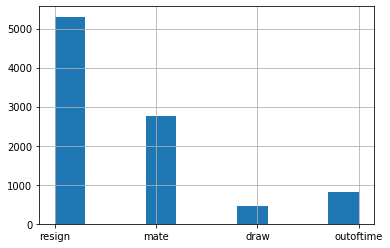

In [75]:
games["victory_status"].hist()

In [76]:
games["victory_status"].isnull().sum()

26

In [77]:
count = 0
for i in range(len(games["victory_status"])):
    if games["victory_status"].isnull().iloc[i] and games["moves"].isnull().iloc[i]:
        count += 1
count

0

In [78]:
for i in range(len(games["victory_status"])):
    if games["victory_status"].isnull().iloc[i] and not games["moves"].isnull().iloc[i]:
        if games["moves"].iloc[i][-1].endswith("#") or games["moves"].iloc[i][-1].endswith("++"):
            games["victory_status"].iloc[i] = "mate"
                                                                                          

In [79]:
games["victory_status"].isnull().sum()

18

We cannot decide whether the result of the game was a draw, resign or outoftime as these results donot have a specific pattern.

In [80]:
games["winner"].isnull().sum()

25

In [81]:
count = 0
for i in range(len(games["winner"])):
    if games["winner"].isnull().iloc[i] and games["moves"].isnull().iloc[i]:
        count += 1
count

0

In [82]:
for i in range(len(games["winner"])):
    if games["winner"].isnull().iloc[i] and not games["moves"].isnull().iloc[i]:
        if games["moves"].iloc[i][-1].endswith("#") or games["moves"].iloc[i][-1].endswith("++"):
            games["winner"].iloc[i] = "black" if len(games["moves"].iloc[i]) % 2 == 0 else "white"

In [83]:
games["winner"].isnull().sum()

20

The null values in the moves cannot be determined as moves column itself has been used to determine the null values in other values.
The left out null values in the victory_status and winner cannot be determined as their corresponding moves column has undeterminable values.
The null values in the opening_eco column have been ignored as of now as they take a lot of resources to be looked into as their values have many possible values

In [84]:
count = 0
for i in range(len(games["turns"])):
    if games["turns"].isnull().iloc[i] and games["moves"].isnull().iloc[i]:
        count += 1
count

0

In [85]:
for i in range(len(games["turns"])):
    if games["turns"].isnull().iloc[i] and not games["moves"].isnull().iloc[i]:
        games["turns"].iloc[i] = len(games["moves"].iloc[i])
games["turns"].isnull().sum()

0

In [86]:
total = 0
for i in games:
    total += games[i].isnull().sum()
    print(i, "->", games[i].isnull().sum())
print("total null values : ", total)

id -> 0
rated -> 0
turns -> 0
victory_status -> 18
winner -> 20
increment_code -> 0
white_id -> 0
white_rating -> 0
black_id -> 0
black_rating -> 0
moves -> 28
opening_eco -> 28
opening_name -> 0
opening_ply -> 0
game_time -> 0
total null values :  94


In [87]:
games.to_csv("games_cleaned.csv")